# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [4]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [ ]:
df = pd.read_csv("./lab12_files/US_Baby_Names_right.csv")

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [5]:
baby_names = pd.read_csv("./lab12_files/US_Baby_Names_right.csv")
print(len(baby_names.values))
print(baby_names.dtypes)

1016395
Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [26]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [6]:
baby_names = baby_names.drop(columns=['Unnamed: 0', 'Id'])
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [32]:
gender_col = baby_names["Gender"].value_counts()
display(gender_col)
print(gender_col['F'] > gender_col['M'])

Gender
F    558846
M    457549
Name: count, dtype: int64

True


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [79]:
by_names = baby_names.groupby("Name")["Count"].count().nlargest(10)
by_names = baby_names["Name"].value_counts().head(10)

by_names

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Angel      962
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

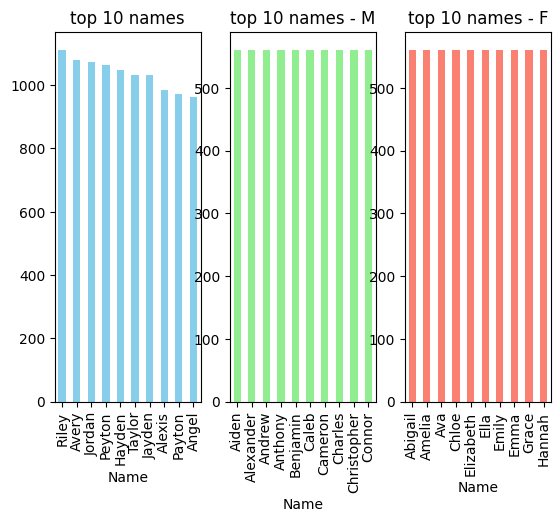

In [88]:
by_names_M = baby_names[baby_names["Gender"] == "M"].groupby("Name")["Count"].count().nlargest(10)
# by_names_M = df[df['Gender'] == 'M']['Name'].value_counts().head(10)

by_names_F = baby_names[baby_names["Gender"] == "F"].groupby("Name")["Count"].count().nlargest(10)
# by_names_F = df[df['Gender'] == 'F']['Name'].value_counts().head(10)

import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
by_names.plot(kind='bar', color='skyblue')
plt.title('top 10 names')

plt.subplot(1, 3, 2)
by_names_M.plot(kind='bar', color='lightgreen')
plt.title('top 10 names - M')

plt.subplot(1, 3, 3)
by_names_F.plot(kind='bar', color='salmon')
plt.title('top 10 names - F')

plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [15]:
# print(baby_names.nunique(axis=0)["Name"])
# print(baby_names.Name.nunique())
# print(baby_names["Name"].nunique())
# print(len(baby_names["Name"].value_counts()))
len(pd.unique(baby_names["Name"]))

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [29]:
import random

# name_probabilities = baby_names.groupby('Name')['Count'].sum() / baby_names['Count'].sum()
name_probabilities = baby_names["Name"].value_counts(normalize=True)
display(name_probabilities)

def name_generator():
    while True:
        yield random.choices(name_probabilities.index, weights=name_probabilities.values)[0]

generator = name_generator()
for _ in range(10):
    print(next(generator))

Name
Riley      1.094063e-03
Avery      1.062579e-03
Jordan     1.055692e-03
Peyton     1.046837e-03
Hayden     1.032079e-03
               ...     
Terryn     9.838695e-07
Yanna      9.838695e-07
Zemirah    9.838695e-07
Emmilyn    9.838695e-07
Coalton    9.838695e-07
Name: proportion, Length: 17632, dtype: float64

Calli
Barbie
Devon
Aubrie
Terrance
Emely
Maliyah
Camden
Kanye
Sienna


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [35]:
most_common_name = baby_names['Name'].value_counts().idxmax()
print(f"Most common name: {most_common_name}")

mean_count = baby_names['Name'].value_counts().mean()
print(f"Mean of names: {mean_count}")

median_count = baby_names['Name'].value_counts().median()
print(f"Median of names: {median_count}")

std_count = baby_names['Name'].value_counts().std()
print(f"Standard deviation of names: {std_count}")

Most common name: Riley
Mean of names: 57.644906987295826
Median of names: 8.0
Standard deviation of names: 122.0299635081389


## Część II

Krok 1: Wczytaj dane

In [1]:
import pandas as pd

data = pd.read_csv('./lab12_files/ocupation.csv', sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [2]:
data.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [3]:
data.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


Krok 5: Wypisz nazwy kolumn

In [6]:
data.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [8]:
data['occupation'].nunique()

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

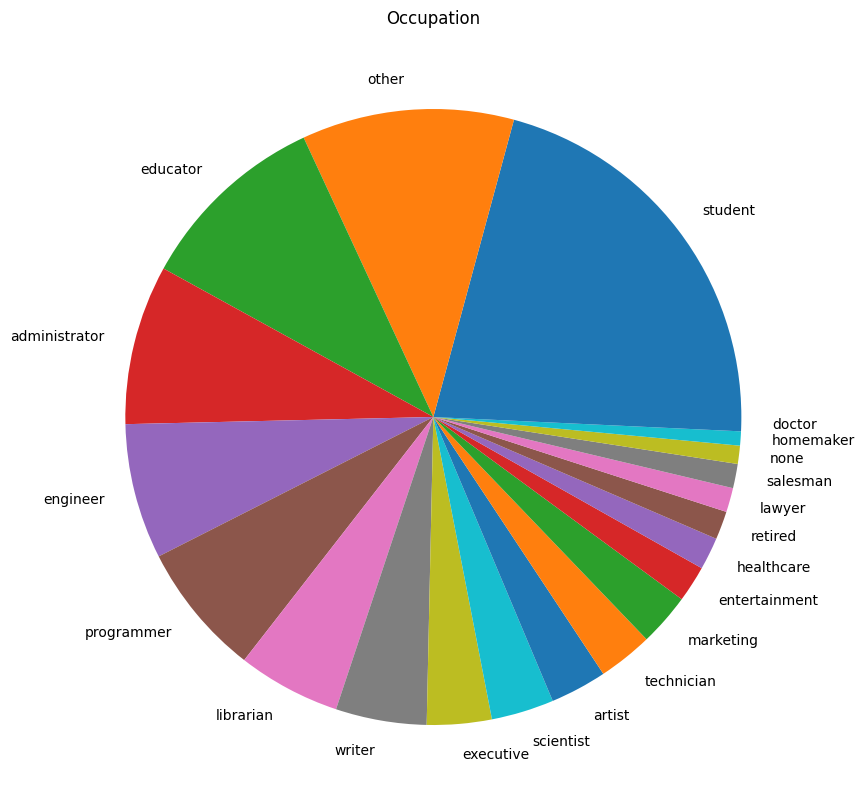

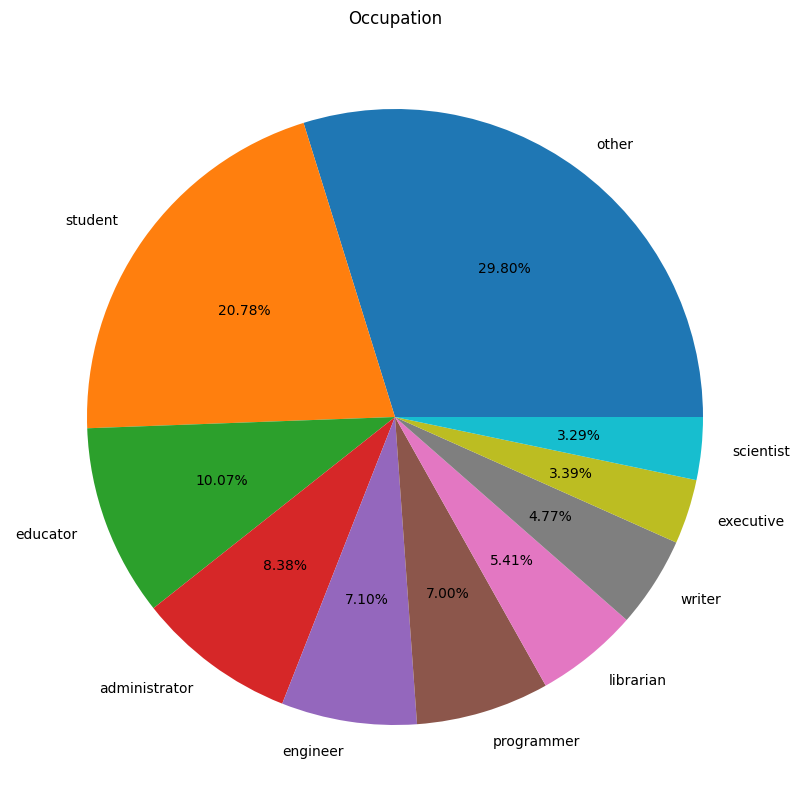

In [13]:
import matplotlib.pyplot as plt

data['occupation'].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f%%', label='')
plt.title('Occupation')
plt.show()


top_10_occupations = data['occupation'].value_counts().head(10).index
top_10_or_other = data['occupation'].apply(lambda x: x if x in top_10_occupations else 'other')

top_10_or_other.value_counts().plot.pie(figsize=(10, 10), autopct='%.2f%%', label='')
plt.title('Occupation')
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

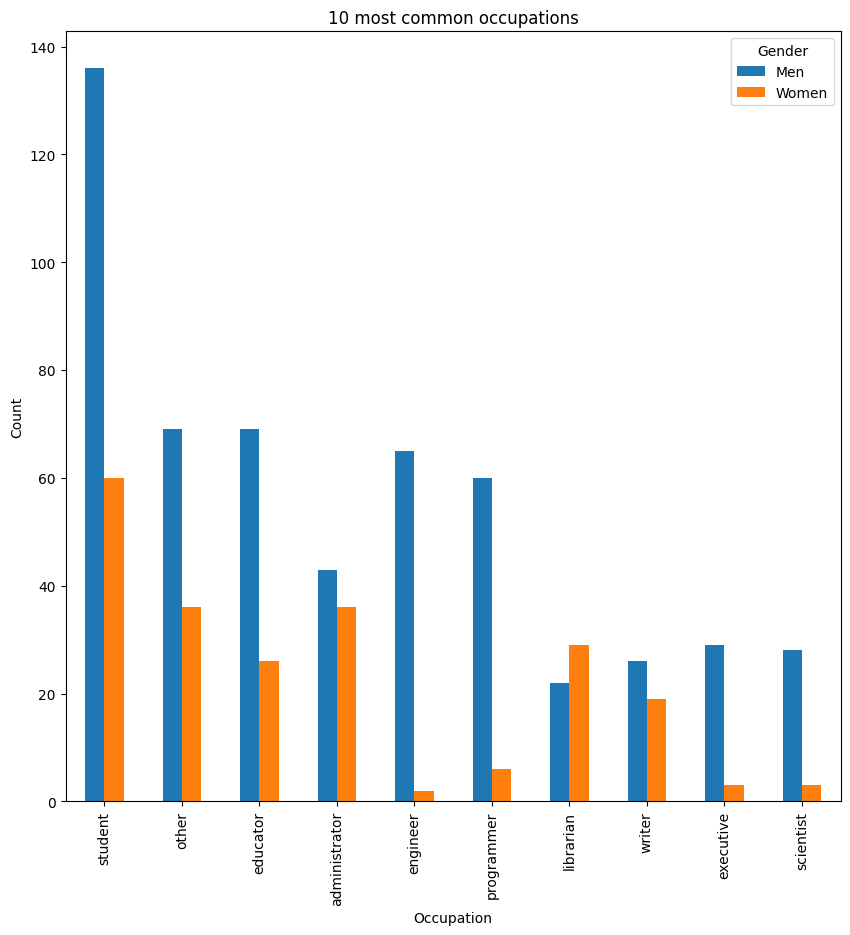

In [10]:


import matplotlib.pyplot as plt

occupation_counts = data.groupby(['occupation', 'gender']).size().unstack()

occupation_counts['total'] = occupation_counts.sum(axis=1)

occupation_counts = occupation_counts.sort_values(by='total', ascending=False).head(10)

del occupation_counts['total']

occupation_counts['Men'] = occupation_counts['M']
occupation_counts['Women'] = occupation_counts['F']
del occupation_counts['M']
del occupation_counts['F']

occupation_counts.plot.bar(figsize=(10, 10))
plt.title('10 most common occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()



Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

<Axes: xlabel='occupation'>

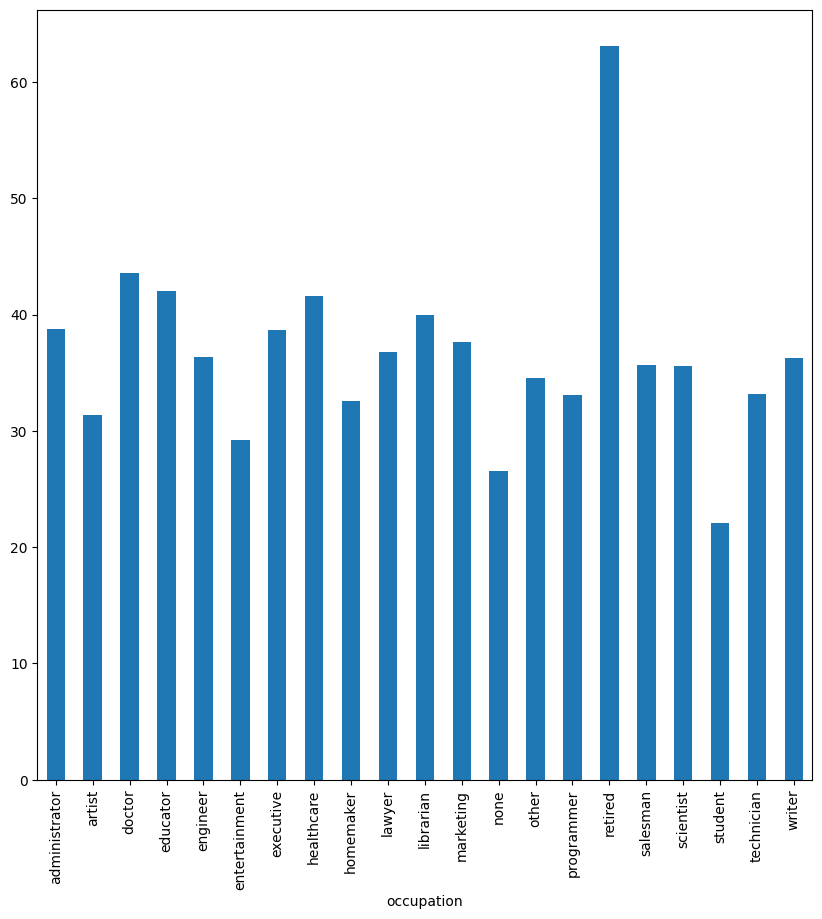

In [11]:
data.groupby('occupation')['age'].mean().plot.bar(figsize=(10, 10))

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

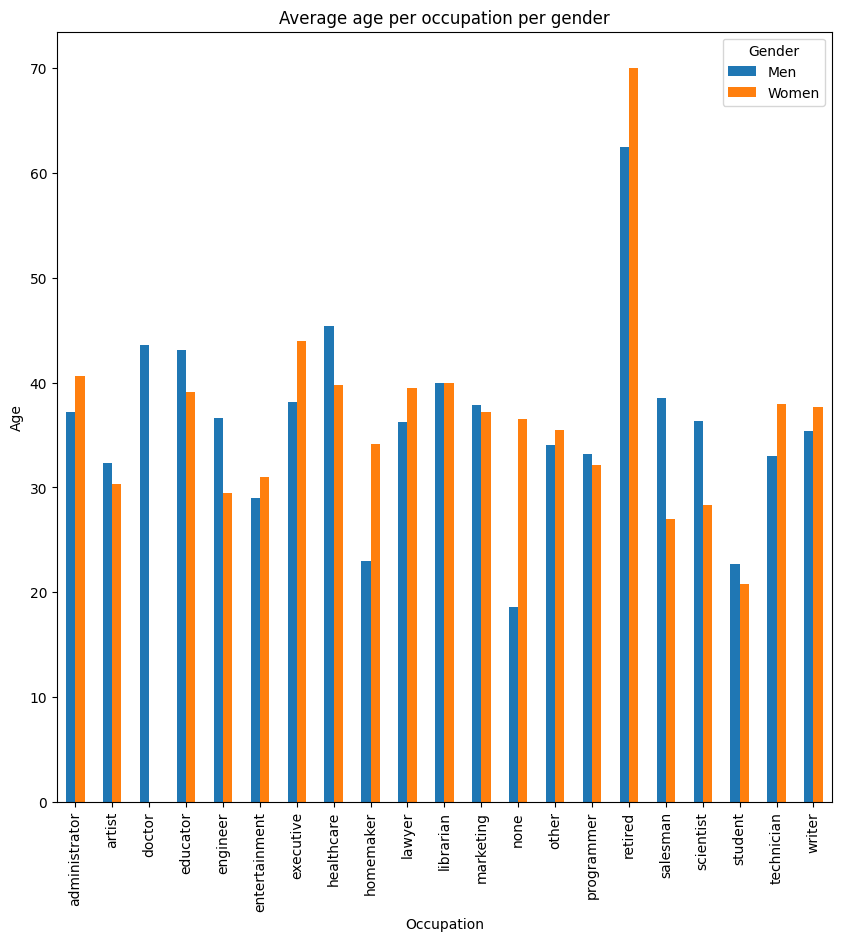

In [12]:


per_age = data.groupby(['occupation', 'gender'])['age'].mean().unstack()

per_age['Men'] = per_age['M']
per_age['Women'] = per_age['F']
del per_age['M']
del per_age['F']

per_age.plot.bar(figsize=(10, 10))
plt.title('Average age per occupation per gender')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

